Sample Data:
    area  bedrooms  bathrooms   price
0  1000         2          1  250000
1  1500         3          2  320000
2  2000         3          2  400000
3  2500         4          3  500000
4  1200         2          1  275000
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


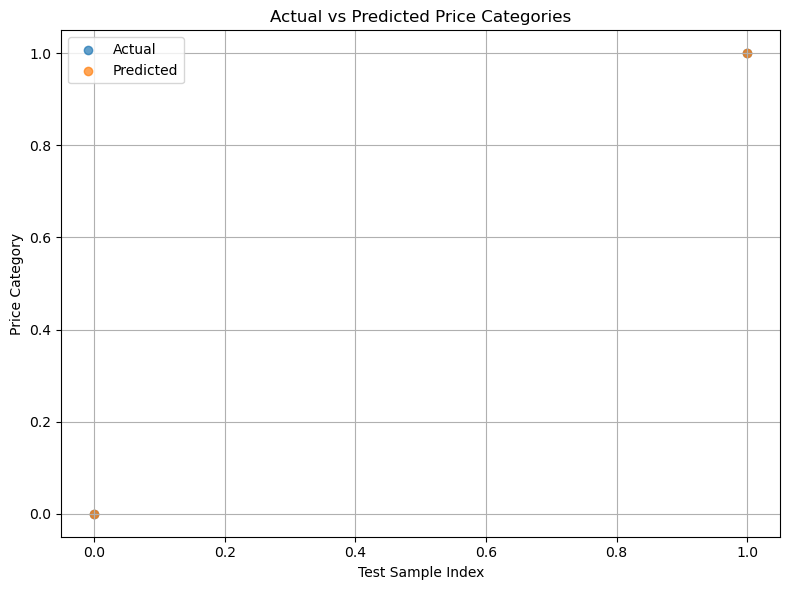

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
data = pd.read_csv('synthetic_house_data.csv')
print("Sample Data:\n", data.head())

# Check if required columns exist
required_columns = {'area', 'bedrooms', 'bathrooms', 'price'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Missing columns in data: {required_columns - set(data.columns)}")

# Categorize price into 3 classes
def categorize_price(price):
    if price < 300000:
        return 0
    elif price < 450000:
        return 1
    else:
        return 2

data['price_category'] = data['price'].apply(categorize_price)

# Features and label
X = data[['area', 'bedrooms', 'bathrooms']]
y = data['price_category']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)  # Removed deprecated multi_class
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Price Category")
plt.title("Actual vs Predicted Price Categories")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
